# Курсовой проект

### Исследование веса рыбок в зависимости от вида и длин различных параметров
#### Ссылка на данные: https://www.kaggle.com/datasets/aungpyaeap/fish-market
##### Этот набор данных представляет собой запись 7 распространенных различных видов рыб, продаваемых на рыбном рынке. С помощью этого набора данных можно выполнить прогностическую модель с использованием удобных для машин данных и оценить вес рыбы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
%matplotlib inline

In [3]:
rcParams['figure.figsize'] = 5,6

In [4]:
import warnings
warnings.filterwarnings('ignore')

#### Species - Видовое название рыбы
#### Weight  - вес рыбы (в граммах)
#### Length1 - Длина от носа до начала хвоста (в см)
#### Length2 - Длина от носа до выреза хвоста (в см)
#### Length3 - Длина от носа до конца хвоста (в см)
#### Height  - Максимальная высота в % от Length3
#### Width   - Максимальная толщина в % от Length3

In [5]:
df = pd.read_csv("./Fish.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### Есть значение веса 0 у вида Плотва(Roach), установим медианный вес

In [7]:
median_weight = df[df.Species=='Roach'].median()
median_weight

Weight     147.5000
Length1     20.5000
Length2     22.2500
Length3     24.8500
Height       6.5126
Width        3.6027
dtype: float64

In [8]:
df.loc[df.Weight<1,'Weight'] = median_weight['Weight']

### Удалим выброс по весу

In [215]:
df = df[df.Weight<1500]
df.shapee

(156, 7)

#### Распределение веса рыбы с маленьким средним и высоким стандартным отклонением, это скорее всего из-за:
       Разные виды рыб(есть маленькие - корюшка, есть большие - щука)
     Проверим на нормальность распределение веса

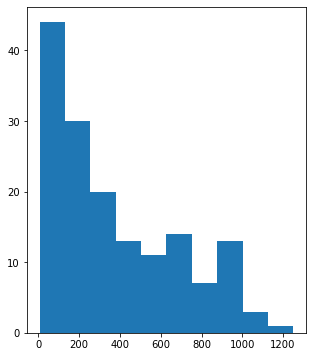

In [216]:
plt.hist(df['Weight'], bins=10)
plt.show()

#### По графику видно что распределение скорее всего не нормальное и средняя, медианна не совпадают, скорее всего мало данных

In [217]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Smelt        14
Pike         14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

### Виды рыб:
1 Окунь - Perch
2 Лещ - Bream
3 Плотва - Roach
4 Щука - Pike
5 Корюшка - Smelt
6 Густера - Parkki
7 Язь - Whitefish

Проведем повидовой анализ влияние каких параметров у разных видов на вес

In [218]:
df_perch = df.loc[df['Species'] == 'Perch', :]
df_perch.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
std,347.617717,8.561572,9.021668,9.529509,2.878177,1.774626
min,5.900000,7.500000,8.400000,8.800000,2.112000,1.408000
25%,120.000000,19.825000,21.825000,23.325000,5.692500,3.525000
50%,207.500000,23.250000,25.300000,26.750000,6.921800,4.154900
75%,692.500000,34.125000,36.625000,39.075000,10.846500,6.448125
max,1100.000000,41.100000,44.000000,46.600000,12.800200,8.142000


In [219]:
df_Bream = df.loc[df['Species'] == 'Bream', :]
df_Bream.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
std,209.205709,3.593699,3.911925,4.157866,1.964707,0.721509
min,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
25%,462.500000,28.000000,30.350000,35.650000,13.958900,4.943400
50%,610.000000,30.400000,33.000000,38.500000,14.954400,5.280100
75%,717.000000,31.950000,35.000000,40.750000,16.360900,6.071600
max,1000.000000,38.000000,41.000000,46.500000,18.957000,6.749700


In [220]:
df_Roach = df.loc[df['Species'] == 'Roach', :]
df_Roach.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,159.425000,20.645000,22.275000,24.970000,6.694795,3.657850
std,81.348709,3.459917,3.651946,4.031599,1.261192,0.690371
min,40.000000,12.900000,14.100000,16.200000,4.147200,2.268000
25%,117.500000,18.900000,20.375000,22.650000,6.037075,3.317325
50%,148.750000,20.500000,22.250000,24.850000,6.512600,3.602700
75%,171.750000,22.025000,23.625000,26.900000,7.164150,3.852900
max,390.000000,29.500000,31.700000,35.000000,9.485000,5.355000


In [221]:
df_Pike = df.loc[df['Species'] == 'Pike', :]
df_Pike.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,529.857143,39.364286,42.128571,45.157143,7.223007,4.764321
std,287.224077,6.385031,6.848855,7.003484,1.365166,0.935816
min,200.000000,30.000000,32.300000,34.800000,5.568000,3.375600
25%,311.250000,34.975000,37.475000,39.975000,6.315300,4.199125
50%,478.000000,40.000000,42.500000,45.500000,7.120000,4.517750
75%,560.250000,42.900000,45.750000,48.525000,7.759500,5.071200
max,1250.000000,52.000000,56.000000,59.700000,10.686300,6.984900


In [222]:
df_Smelt = df.loc[df['Species'] == 'Smelt', :]
df_Smelt.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
std,4.131526,1.216372,1.432147,1.426457,0.351780,0.286611
min,6.700000,9.300000,9.800000,10.800000,1.728400,1.047600
25%,8.950000,10.475000,11.050000,12.100000,2.004450,1.161475
50%,9.850000,11.300000,11.800000,13.100000,2.200200,1.273100
75%,12.200000,11.650000,12.350000,13.475000,2.261225,1.356300
max,19.900000,13.800000,15.000000,16.200000,2.932200,2.067200


In [223]:
df_Parkki = df.loc[df['Species'] == 'Parkki', :]
df_Parkki.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
std,78.755086,3.284841,3.557348,3.959155,1.615650,0.643347
min,55.000000,13.500000,14.700000,16.500000,6.577200,2.314200
25%,105.000000,16.900000,18.350000,20.550000,7.898700,2.795550
50%,145.000000,19.000000,20.700000,23.200000,8.892800,3.292800
75%,185.000000,20.500000,22.250000,24.950000,10.041100,3.537000
max,300.000000,24.000000,26.000000,29.000000,11.368000,4.234000


In [224]:
df_Whitefish = df.loc[df['Species'] == 'Whitefish', :]
df_Whitefish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050
std,309.602972,5.580681,5.723781,6.023759,1.830201,1.194258
min,270.000000,23.600000,26.000000,28.700000,8.145400,4.247600
25%,279.000000,24.475000,26.875000,29.675000,8.479800,4.356775
50%,423.000000,27.050000,29.500000,32.400000,9.761000,5.603300
75%,735.000000,32.400000,35.050000,38.200000,11.506900,6.552750
max,1000.000000,37.300000,40.000000,43.500000,12.354000,6.573600


In [225]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.896094,0.900079,0.907686,0.802427,0.924213
Length1,0.896094,1.000000,0.999418,0.990612,0.676326,0.889166
Length2,0.900079,0.999418,1.000000,0.993049,0.691954,0.895584
Length3,0.907686,0.990612,0.993049,1.000000,0.756019,0.897053
Height,0.802427,0.676326,0.691954,0.756019,1.000000,0.800542
Width,0.924213,0.889166,0.895584,0.897053,0.800542,1.000000


#### Общая корреляция на вес рыб показывает связь между весом:
    Length1, Length2, Length3(это почти один и тот же параметр рыб)
    Height, Width коррелируют намного меньше

<AxesSubplot:xlabel='Length2', ylabel='Weight'>

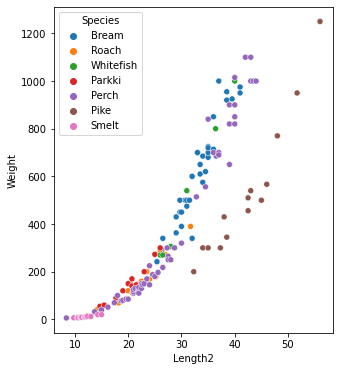

In [226]:
sns.scatterplot(x=df.Length2, y=df.Weight, hue=df.Species)

#### На графике видно что выделяются 3 группы видов рыб у которых четко выражена линейная зависимость Length и Height
    Посмотрим на каждый вид по отдельности и выделим корреляции

In [227]:
df_perch.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.958361,0.958656,0.959506,0.968441,0.963943
Length1,0.958361,1.000000,0.999713,0.999427,0.985420,0.974447
Length2,0.958656,0.999713,1.000000,0.999779,0.985584,0.974617
Length3,0.959506,0.999427,0.999779,1.000000,0.985909,0.975131
Height,0.968441,0.985420,0.985584,0.985909,1.000000,0.982943
Width,0.963943,0.974447,0.974617,0.975131,0.982943,1.000000


<AxesSubplot:xlabel='Length3', ylabel='Weight'>

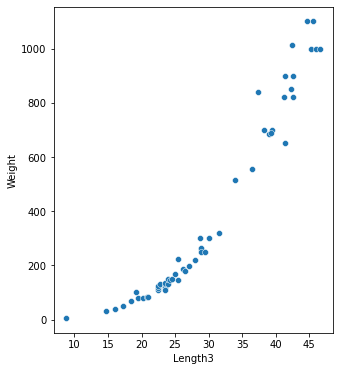

In [228]:
sns.scatterplot(x=df_perch.Length3, y=df_perch.Weight)

In [229]:
df_Bream.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.937050,0.946256,0.947136,0.964528,0.925303
Length1,0.937050,1.000000,0.997713,0.996353,0.939384,0.899298
Length2,0.946256,0.997713,1.000000,0.998237,0.950391,0.915717
Length3,0.947136,0.996353,0.998237,1.000000,0.952900,0.921206
Height,0.964528,0.939384,0.950391,0.952900,1.000000,0.926692
Width,0.925303,0.899298,0.915717,0.921206,0.926692,1.000000


<AxesSubplot:xlabel='Height', ylabel='Weight'>

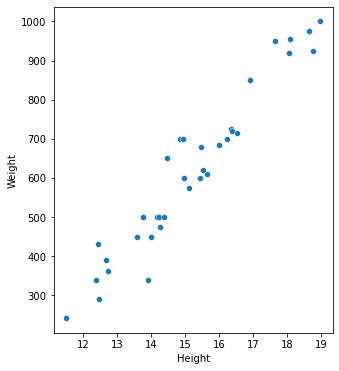

In [230]:
sns.scatterplot(x=df_Bream.Height, y=df_Bream.Weight)

In [231]:
df_Roach.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.946441,0.950141,0.950687,0.957430,0.966938
Length1,0.946441,1.000000,0.998456,0.995986,0.944971,0.959626
Length2,0.950141,0.998456,1.000000,0.997550,0.951763,0.963086
Length3,0.950687,0.995986,0.997550,1.000000,0.956686,0.964492
Height,0.957430,0.944971,0.951763,0.956686,1.000000,0.951269
Width,0.966938,0.959626,0.963086,0.964492,0.951269,1.000000


<AxesSubplot:xlabel='Width', ylabel='Weight'>

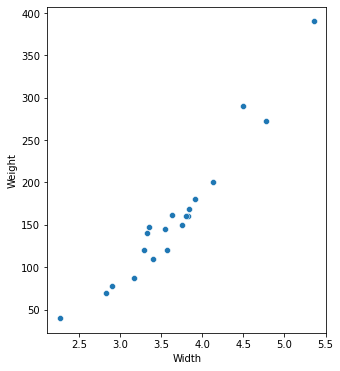

In [232]:
sns.scatterplot(x=df_Roach.Width, y=df_Roach.Weight)

In [233]:
df_Pike.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.948366,0.953925,0.961982,0.962985,0.972943
Length1,0.948366,1.000000,0.999652,0.997061,0.932132,0.919919
Length2,0.953925,0.999652,1.000000,0.997773,0.936497,0.926557
Length3,0.961982,0.997061,0.997773,1.000000,0.934704,0.940135
Height,0.962985,0.932132,0.936497,0.934704,1.000000,0.947367
Width,0.972943,0.919919,0.926557,0.940135,0.947367,1.000000


<AxesSubplot:xlabel='Length3', ylabel='Weight'>

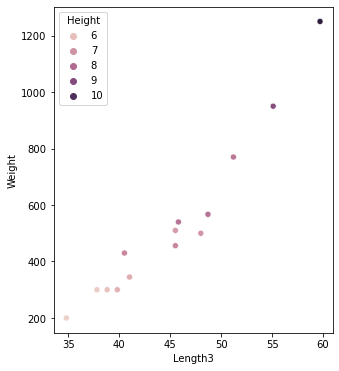

In [234]:
sns.scatterplot(x=df_Pike.Length3, y=df_Pike.Weight, hue=df_Pike.Height)

In [235]:
df_Smelt.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.947743,0.960818,0.947868,0.960512,0.922378
Length1,0.947743,1.000000,0.997199,0.997566,0.937659,0.817129
Length2,0.960818,0.997199,1.000000,0.994037,0.941374,0.836672
Length3,0.947868,0.997566,0.994037,1.000000,0.936907,0.821387
Height,0.960512,0.937659,0.941374,0.936907,1.000000,0.867391
Width,0.922378,0.817129,0.836672,0.821387,0.867391,1.000000


<AxesSubplot:xlabel='Height', ylabel='Weight'>

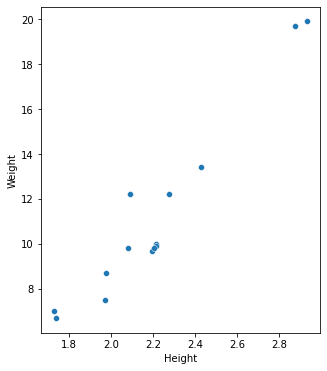

In [236]:
sns.scatterplot(x=df_Smelt.Height, y=df_Smelt.Weight)

In [237]:
df_Parkki.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.972159,0.971837,0.970830,0.964023,0.985956
Length1,0.972159,1.000000,0.999941,0.999852,0.982392,0.981945
Length2,0.971837,0.999941,1.000000,0.999955,0.982578,0.982896
Length3,0.970830,0.999852,0.999955,1.000000,0.983122,0.982749
Height,0.964023,0.982392,0.982578,0.983122,1.000000,0.970568
Width,0.985956,0.981945,0.982896,0.982749,0.970568,1.000000


<AxesSubplot:xlabel='Length3', ylabel='Weight'>

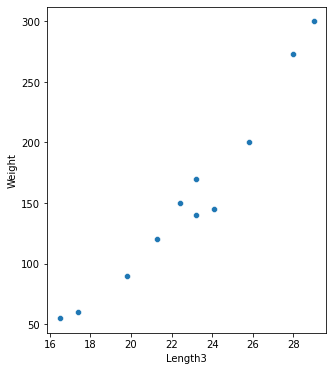

In [238]:
sns.scatterplot(x=df_Parkki.Length3, y=df_Parkki.Weight)

In [239]:
df_Whitefish.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.996160,0.996344,0.996465,0.976360,0.874514
Length1,0.996160,1.000000,0.999981,0.999980,0.968587,0.860283
Length2,0.996344,0.999981,1.000000,0.999971,0.968999,0.860854
Length3,0.996465,0.999980,0.999971,1.000000,0.968463,0.860157
Height,0.976360,0.968587,0.968999,0.968463,1.000000,0.955991
Width,0.874514,0.860283,0.860854,0.860157,0.955991,1.000000


<AxesSubplot:xlabel='Length3', ylabel='Weight'>

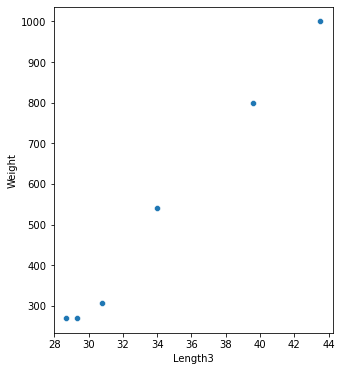

In [240]:
sns.scatterplot(x=df_Whitefish.Length3, y=df_Whitefish.Weight)

### Прослеживается влияние Length3, Height и Width.
    Объеденим рыб в зависимости от этих 3 параметров

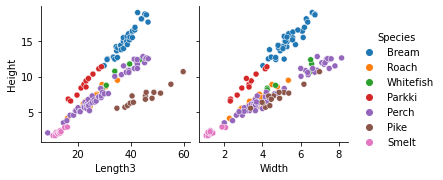

In [241]:
sns.pairplot(data= df, x_vars = ['Length3','Width'], y_vars ='Height',hue='Species')

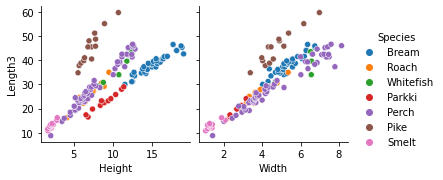

In [242]:
sns.pairplot(data= df, x_vars = ['Height','Width'], y_vars ='Length3',hue='Species')

Прослеживается 2-3 группы рыб с примерно одинаковыми линейными зависимостями

In [243]:
df_one_g = df[(df.Species=='Bream')|(df.Species=='Parkki')]
df_one_g.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,507.108696,27.536957,30.056522,34.632609,13.695633,4.899883
std,272.615254,6.090114,6.683700,7.848285,3.270177,1.179462
min,55.000000,13.500000,14.700000,16.500000,6.577200,2.314200
25%,292.500000,23.925000,26.075000,30.275000,11.734450,4.251900
50%,500.000000,28.900000,31.250000,36.300000,14.244700,5.119000
75%,700.000000,31.725000,34.875000,40.300000,15.903450,5.692950
max,1000.000000,38.000000,41.000000,46.500000,18.957000,6.749700


In [244]:
df_one_g.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.954825,0.957543,0.948788,0.967473,0.953771
Length1,0.954825,1.000000,0.999378,0.996997,0.982449,0.971089
Length2,0.957543,0.999378,1.000000,0.997833,0.985544,0.975675
Length3,0.948788,0.996997,0.997833,1.000000,0.985215,0.975763
Height,0.967473,0.982449,0.985544,0.985215,1.000000,0.977452
Width,0.953771,0.971089,0.975675,0.975763,0.977452,1.000000


<AxesSubplot:xlabel='Height', ylabel='Width'>

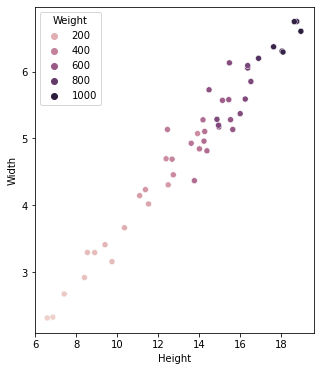

In [245]:
sns.scatterplot(x=df_one_g.Height, y=df_one_g.Width, hue=df_one_g.Weight)

In [246]:
df_two_g = df[(df.Species=='Smelt')|(df.Species=='Perch')|(df.Species=='Roach')|(df.Species=='Whitefish')]
df_two_g.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,291.004167,22.755208,24.607292,26.497917,6.929737,4.067886
std,316.319939,8.639309,9.266115,9.728450,3.117800,1.879467
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,83.750000,17.425000,18.950000,20.675000,5.221425,3.046850
50%,150.000000,21.000000,22.600000,25.000000,6.457350,3.703250
75%,309.500000,27.125000,29.025000,31.000000,8.802700,4.864525
max,1100.000000,41.100000,44.000000,46.600000,12.800200,8.142000


In [247]:
df_two_g.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.944213,0.940570,0.936661,0.920846,0.931684
Length1,0.944213,1.000000,0.999498,0.997862,0.979430,0.979372
Length2,0.940570,0.999498,1.000000,0.998124,0.981312,0.981044
Length3,0.936661,0.997862,0.998124,1.000000,0.986215,0.980149
Height,0.920846,0.979430,0.981312,0.986215,1.000000,0.982866
Width,0.931684,0.979372,0.981044,0.980149,0.982866,1.000000


<AxesSubplot:xlabel='Width', ylabel='Height'>

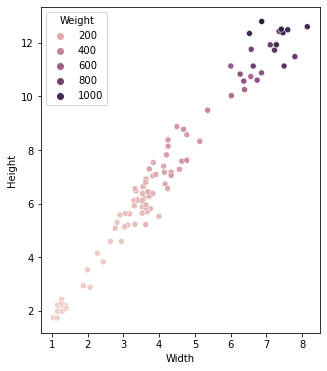

In [248]:
sns.scatterplot(x=df_two_g.Width, y=df_two_g.Height, hue=df_two_g.Weight)

### Применим метод главных компонент чтоб объеденить параметры в 1

In [249]:
target_one_g = df_one_g[['Weight', 'Species']]
X_one_g = df_one_g.drop(['Weight', 'Species'], axis=1)

In [250]:
X_one_g_cent = X_one_g - X_one_g.mean(axis=0)
X_one_g_cent.T

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Length1,-4.336957,-3.536957,-3.636957,-1.236957,-1.036957,-0.736957,-0.736957,0.063043,0.063043,0.963043,...,-13.236957,-11.236957,-10.036957,-9.136957,-8.536957,-8.536957,-7.736957,-6.336957,-4.536957,-3.536957
Length2,-4.656522,-3.756522,-3.556522,-1.056522,-1.056522,-0.356522,-0.356522,-0.056522,-0.056522,0.643478,...,-14.556522,-12.356522,-11.056522,-10.056522,-9.356522,-9.356522,-8.556522,-7.056522,-5.056522,-4.056522
Length3,-4.632609,-3.432609,-3.532609,-1.132609,-0.632609,0.067391,-0.132609,0.367391,0.467391,1.567391,...,-17.232609,-14.832609,-13.332609,-12.232609,-11.432609,-11.432609,-10.532609,-8.832609,-6.632609,-5.632609
Height,-2.175633,-1.215633,-1.317833,-0.965633,-1.251633,-0.093233,0.483867,-1.025633,0.309267,0.530967,...,-7.118433,-6.290433,-5.303433,-4.802833,-5.158033,-4.299633,-3.959233,-3.349833,-2.607633,-2.327633
Width,-0.879883,-0.594283,-0.203783,-0.444383,0.234117,0.027517,0.378617,-0.209883,-0.056083,0.059517,...,-2.585683,-2.226883,-1.981783,-1.607083,-1.605483,-1.489483,-1.742783,-1.236283,-0.755883,-0.665883


In [251]:
X_one_g_cov = np.cov(X_one_g_cent.T)
X_one_g_cov

array([[37.08949275, 40.67919807, 47.65343478, 19.56620588,  6.97539221],
       [40.67919807, 44.67184541, 52.34189372, 21.54091145,  7.69141234],
       [47.65343478, 52.34189372, 61.59557971, 25.28581114,  9.03239414],
       [19.56620588, 21.54091145, 25.28581114, 10.69405444,  3.77007942],
       [ 6.97539221,  7.69141234,  9.03239414,  3.77007942,  1.39113061]])

In [252]:
eigenvalues, eigenvectors = np.linalg.eig(X_one_g_cov)

print('eigenvalues:\n{}\n'.format(eigenvalues))
print('eigenvectors:\n{}'.format(eigenvectors))

eigenvalues:
[1.54892515e+02 3.16088651e-01 1.65227838e-01 1.39053689e-02
 5.43660023e-02]

eigenvectors:
[[-0.48882248  0.33607718 -0.46491762 -0.6400001  -0.14951988]
 [-0.53679611  0.13847911 -0.3791848   0.70485946  0.22817867]
 [-0.63010509  0.02653376  0.76759273 -0.03715325 -0.10809518]
 [-0.25942822 -0.90286862 -0.22056526 -0.05583179 -0.25643524]
 [-0.09255859 -0.22803483  0.04714718 -0.29845513  0.92094229]]


In [253]:
#Возьмем 1 вектор
X_one_g_new = X_one_g_cent.dot(eigenvectors[:, [0]])

In [254]:
total_variance = X_one_g_cov[0, 0] + X_one_g_cov[1, 1] + X_one_g_cov[2, 2] +X_one_g_cov[3, 3] +X_one_g_cov[4, 4]
total_variance

155.44210291944447

In [255]:
variance = X_one_g_new.var()

variance/total_variance

0    0.996464
dtype: float64

In [256]:
X_one_g_new = X_one_g_new.merge(target_one_g, right_index=True, left_index=True)

In [257]:
X_one_g_new.head()

,0,Weight,Species
0,8.184496,242.0,Bream
1,6.278710,290.0,Bream
2,6.273613,340.0,Bream
3,2.177095,363.0,Bream
4,1.775674,430.0,Bream


### Потеря только 0.35% информации

In [258]:
target_two_g = df_two_g[['Weight', 'Species']]
X_two_g = df_two_g.drop(['Weight', 'Species'], axis=1)

In [259]:
X_two_g_cent = X_two_g - X_two_g.mean(axis=0)
X_two_g_cent.T

,35,36,37,38,39,40,41,42,43,44,...,149,150,151,152,153,154,155,156,157,158
Length1,-9.855208,-6.255208,-5.255208,-4.555208,-4.155208,-3.755208,-3.655208,-3.355208,-2.355208,-2.255208,...,-12.055208,-11.955208,-11.455208,-11.455208,-11.355208,-11.255208,-11.055208,-10.655208,-9.555208,-8.955208
Length2,-10.507292,-6.407292,-5.807292,-4.807292,-4.607292,-4.107292,-3.807292,-3.607292,-2.607292,-2.607292,...,-13.407292,-13.307292,-12.807292,-12.807292,-12.607292,-12.407292,-12.207292,-11.607292,-10.307292,-9.607292
Length3,-10.297917,-6.197917,-5.297917,-4.297917,-4.297917,-3.697917,-3.397917,-2.797917,-1.797917,-2.197917,...,-14.097917,-13.897917,-13.397917,-13.397917,-13.297917,-13.097917,-12.997917,-12.697917,-11.297917,-10.297917
Height,-2.782537,-1.631437,-1.354137,-1.313137,-0.713737,-0.454537,-0.762037,-0.815137,-1.125237,-0.295837,...,-4.846537,-4.951537,-4.715837,-4.715837,-4.725337,-4.839337,-4.499737,-4.652737,-4.056937,-3.997537
Width,-1.799886,-1.246186,-1.163486,-0.893286,-0.493686,-0.716286,-0.672186,-0.773586,-0.313486,-0.520086,...,-2.790686,-2.782686,-2.784086,-2.901986,-2.919486,-2.674286,-2.798886,-2.812086,-2.000686,-2.188686


In [260]:
X_two_g_cov = np.cov(X_two_g_cent.T)
X_two_g_cov

array([[74.6376568 , 80.01264583, 83.86737939, 26.38156454, 15.90235276],
       [80.01264583, 85.86089364, 89.97580482, 28.34999593, 17.08522863],
       [83.86737939, 89.97580482, 94.64273246, 29.91323187, 17.92134355],
       [26.38156454, 28.34999593, 29.91323187,  9.72067497,  5.75940163],
       [15.90235276, 17.08522863, 17.92134355,  5.75940163,  3.53239592]])

In [261]:
eigenvalues, eigenvectors = np.linalg.eig(X_two_g_cov)

print('eigenvalues:\n{}\n'.format(eigenvalues))
print('eigenvectors:\n{}'.format(eigenvectors))

eigenvalues:
[2.67688179e+02 4.45826077e-01 1.70356111e-01 3.53602912e-02
 5.46324362e-02]

eigenvectors:
[[-0.52771668  0.38484794 -0.16638387 -0.72101184 -0.16082756]
 [-0.56611875  0.27601903 -0.31356752  0.68004318 -0.20625164]
 [-0.59422807 -0.30837295  0.641695    0.03923586  0.37213868]
 [-0.18760634 -0.78363754 -0.2346592  -0.1079416  -0.53291627]
 [-0.11278977 -0.25792226 -0.63808651 -0.06702504  0.71351792]]


In [262]:
#Возьмем 1 вектор
X_two_g_new = X_two_g_cent.dot(eigenvectors[:, [0]])

In [263]:
total_variance = X_two_g_cov[0, 0] + X_two_g_cov[1, 1] + X_two_g_cov[2, 2] +X_two_g_cov[3, 3] +X_two_g_cov[4, 4]
total_variance

268.39435378355154

In [264]:
variance = X_two_g_new.var()

variance/total_variance

0    0.997369
dtype: float64

In [265]:
X_two_g_new = X_two_g_new.merge(target_two_g, right_index=True, left_index=True)

In [266]:
X_two_g_new.head()

,0,Weight,Species
35,17.993474,40.0,Roach
36,11.057867,69.0,Roach
37,9.594323,78.0,Roach
38,8.026407,87.0,Roach
39,7.544574,120.0,Roach


### Потеря только 0.26% информации
    

In [267]:
target_pike_g = df_Pike[['Weight', 'Species']]
X_pike_g = df_Pike.drop(['Weight', 'Species'], axis=1)

In [268]:
X_pike_g_cent = X_pike_g - X_pike_g.mean(axis=0)
X_pike_g_cent.T

,128,129,130,131,132,133,134,135,136,137,138,139,140,141
Length1,-9.364286,-7.664286,-6.664286,-4.564286,-3.864286,-3.364286,0.635714,0.635714,0.735714,2.635714,3.835714,5.435714,8.935714,12.635714
Length2,-9.828571,-8.128571,-7.128571,-4.828571,-4.128571,-3.628571,0.371429,0.371429,0.871429,2.871429,3.871429,5.871429,9.571429,13.871429
Length3,-10.357143,-7.357143,-6.357143,-5.357143,-4.657143,-4.157143,0.342857,0.342857,0.642857,2.842857,3.542857,6.042857,9.942857,14.542857
Height,-1.655007,-1.515207,-1.286607,-0.934607,0.066993,-0.827007,0.056993,-0.398007,0.562993,-0.263007,0.568993,0.456993,1.703193,3.463293
Width,-1.388721,-0.606321,-0.379921,-0.744521,-0.187821,-0.787321,-0.441821,-0.305321,0.365279,0.131679,0.105679,0.611679,1.406879,2.220579


In [269]:
X_pike_g_cov = np.cov(X_pike_g_cent.T)
X_pike_g_cov

array([[40.76862637, 43.71494505, 44.58604396,  8.12505258,  5.49671159],
       [43.71494505, 46.90681319, 47.85901099,  8.75608824,  5.93854857],
       [44.58604396, 47.85901099, 49.04879121,  8.93663033,  6.16162022],
       [ 8.12505258,  8.75608824,  8.93663033,  1.86367915,  1.21030367],
       [ 5.49671159,  5.93854857,  6.16162022,  1.21030367,  0.87575134]])

In [270]:
eigenvalues, eigenvectors = np.linalg.eig(X_pike_g_cov)

print('eigenvalues:\n{}\n'.format(eigenvalues))
print('eigenvectors:\n{}'.format(eigenvectors))

eigenvalues:
[1.38945805e+02 3.11358599e-01 1.80108301e-01 7.59609782e-03
 1.87931331e-02]

eigenvectors:
[[-0.54132204  0.31604524 -0.31963275 -0.70655915 -0.07546476]
 [-0.58085422  0.13594527 -0.29118426  0.58821661  0.46188766]
 [-0.59357104 -0.21948056  0.65092893  0.1054583  -0.40579772]
 [-0.10853594 -0.72832876 -0.57404321  0.05485127 -0.35386848]
 [-0.07397435 -0.55045417  0.24456605 -0.37502703  0.70076399]]


In [271]:
#Возьмем 1 вектор
X_pike_g_new = X_pike_g_cent.dot(eigenvectors[:, [0]])

In [272]:
total_variance = X_pike_g_cov[0, 0] + X_pike_g_cov[1, 1] + X_pike_g_cov[2, 2] +X_pike_g_cov[3, 3] +X_pike_g_cov[4, 4]
total_variance

139.46366125483522

In [273]:
variance = X_pike_g_new.var()

variance/total_variance

0    0.996287
dtype: float64

In [274]:
X_pike_g_new = X_pike_g_new.merge(target_pike_g, right_index=True, left_index=True)

In [275]:
X_pike_g_new.head()

,0,Weight,Species
128,17.208119,200.0,Pike
129,13.446655,300.0,Pike
130,11.689349,300.0,Pike
131,8.611803,300.0,Pike
132,7.260889,430.0,Pike


### Потеря информации 0.37%

## Объеденим все в один датафрейм и вычислим линейную регрессию

In [276]:
df_final = pd.concat([X_one_g_new, X_two_g_new, X_pike_g_new])
df_final.head()

,0,Weight,Species
0,8.184496,242.0,Bream
1,6.278710,290.0,Bream
2,6.273613,340.0,Bream
3,2.177095,363.0,Bream
4,1.775674,430.0,Bream


In [277]:
df_final_X = df_final.drop(['Weight', 'Species'], axis=1)
df_final_X.describe()

,0
count,1.560000e+02
mean,2.277381e-15
std,1.485561e+01
min,-3.404548e+01
25%,-8.257225e+00
50%,5.027008e-01
75%,8.900981e+00
max,2.894612e+01


In [278]:
df_final_Y = df_final.drop([0, 'Species'], axis=1)
df_final_Y.head()

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


In [279]:
X_mean = df_final_X.mean()[0]
X_2 = (df_final_X ** 2).mean()[0]
X_mean, X_2

(2.2773805633336546e-15, 219.27458741497182)

In [280]:
Y_mean = df_final_Y.mean()[0]
Y_mean

376.1628205128205

In [281]:
b1 = (((df_final_X.to_numpy() * df_final_Y.to_numpy()).mean()) - (X_mean * Y_mean)) / (X_2 - (X_mean ** 2))
b1

-19.017010610971354

In [282]:
b0 = Y_mean - b1 * X_mean
b0

376.16282051282053

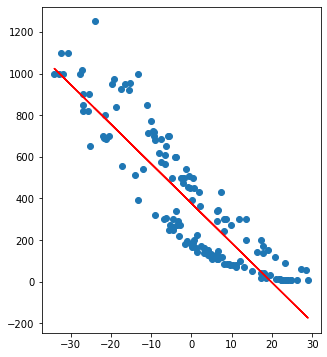

In [283]:
ox = df_final_X
oy = b0 + b1 * df_final_X.to_numpy().T[0]

plt.scatter(df_final_X, df_final_Y)
plt.plot(ox, oy, color='red')
plt.show()